## ARIMA MODEL

* AutoRegressive Integrated Moving Average
* Great with Clear Trend and Seasonality

* SARIM
* AR : Autoregressions
* I : Integrated
* MA : Moving Average


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sum
import seaborn as sns

import chart_studio.plotly as py

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf #Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df


### ARIMA Model (Auto Regression)

#### Regression Example

<Axes: xlabel='total_bill', ylabel='tip'>

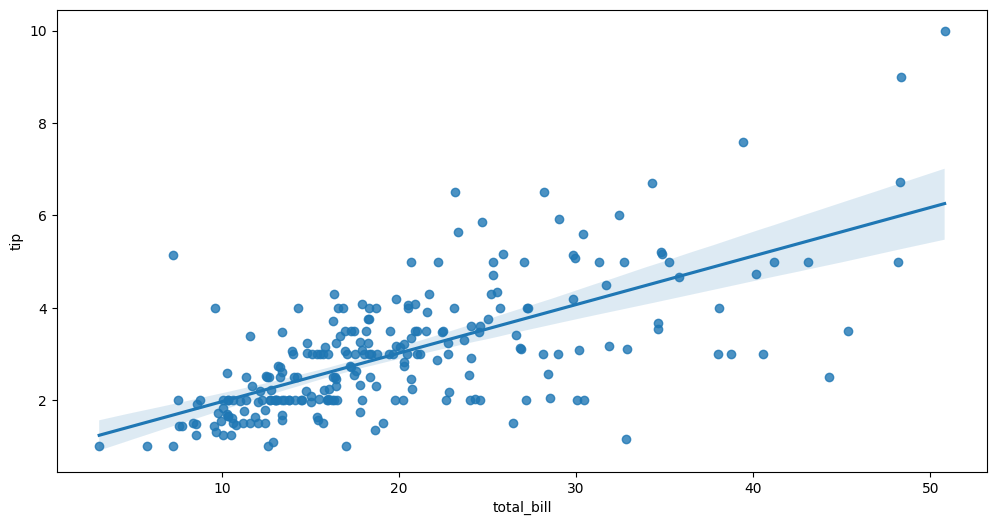

In [4]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(12,6))
sns.regplot(x='total_bill', y='tip', data=tips)

##### Regression Time Series Example with AutoReg

##### Weather Data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_372\4268159595.py:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



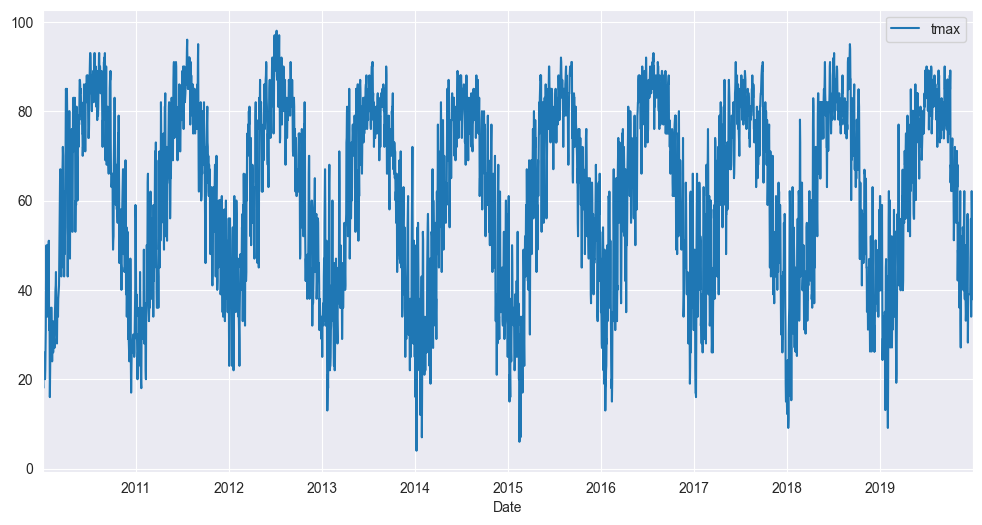

In [13]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

pitt_df = pd.read_csv('../datasets/PittsburghWeather.csv', index_col='Date', parse_dates=True)
pitt_df = pitt_df.drop(columns=['tmin', 'prcp'], axis=1)
pitt_df = pitt_df[pitt_df.index>'2010-01-01']
pitt_df = pitt_df.asfreq('d')
pitt_df = pitt_df.fillna(method='ffill')
# print(pitt_df.isnull())
sns.set_style('darkgrid')

pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = pitt_df.plot(ax=ax)

In [19]:
model = AutoReg(pitt_df['tmax'], 30)
model_fit = model.fit()

train_df = pitt_df.iloc[:2920]
test_df = pitt_df.iloc[2920:]

<Axes: xlabel='Date'>

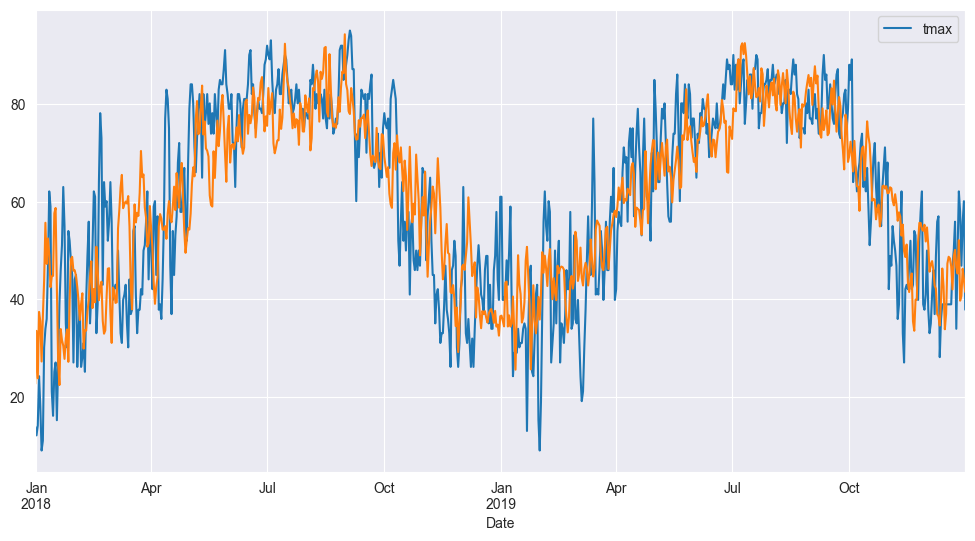

In [17]:
train_model = AutoReg(train_df['tmax'], 730).fit(cov_type='HC0')  # or 'HC1', 'HC2', etc. depending on your preference

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot()
prediction.plot(ax=ax)

##### Stock Market Price Data(Apple)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_372\3467777654.py:6: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: xlabel='Date'>

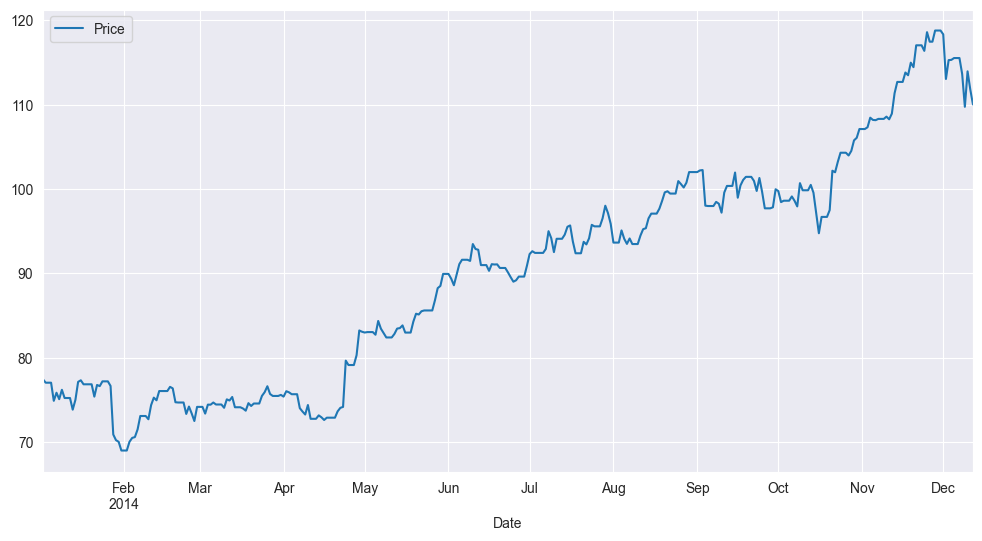

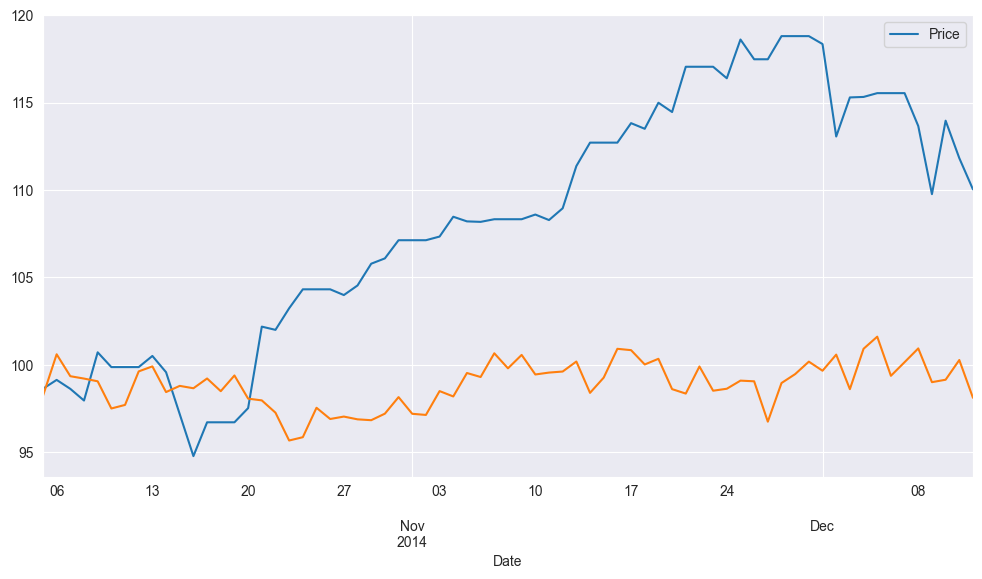

In [25]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

apple_df = pd.read_csv('../datasets/appl2.csv', index_col='Date', parse_dates=True)

apple_df = apple_df.asfreq('d')
apple_df = apple_df.fillna(method='ffill')

# print(pitt_df.isnull())
sns.set_style('darkgrid')

pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = apple_df.plot(ax=ax)

model = AutoReg(apple_df['Price'], 30)
model_fit = model.fit()

train_df = apple_df.iloc[:276]
test_df = apple_df.iloc[276:]

train_model = AutoReg(train_df['Price'], 100).fit(cov_type='HC0')  # or 'HC1', 'HC2', etc. depending on your preference

start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot()
prediction.plot(ax=ax)


In [30]:
# forcast = train_model.predict(start=end, end=end+60, dynamic=True)
# ax = forcast.plot(ax=ax)

<Axes: xlabel='Date'>

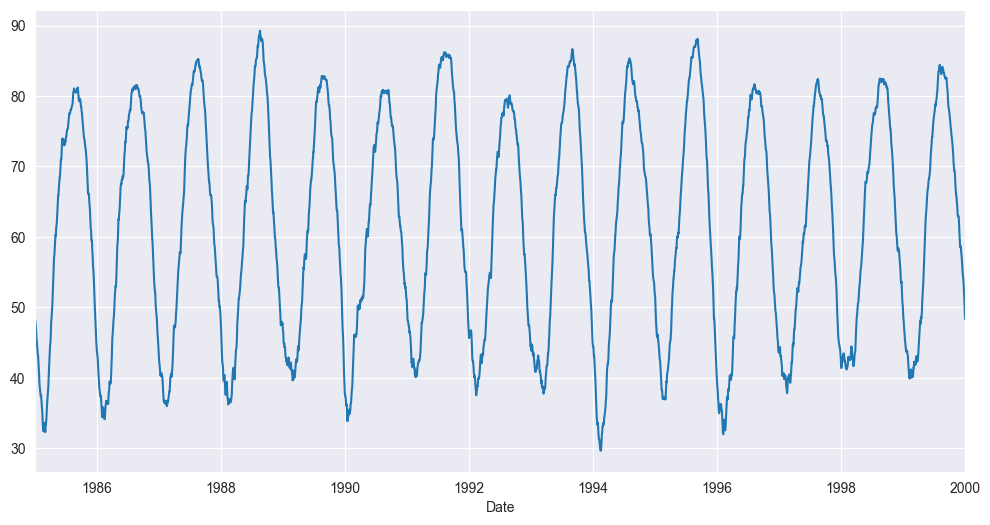

In [31]:
pitt_df = pd.read_csv('../datasets/PittsburghWeather.csv', index_col='Date', parse_dates=True)
df_2 = pitt_df.rolling(window=60).mean()['tmax']
mask = (df_2.index > '1985-01-01') & (df_2.index <= '2000-01-01')
df_2 = df_2.loc[mask]
df_2.plot()


<Axes: xlabel='Year'>

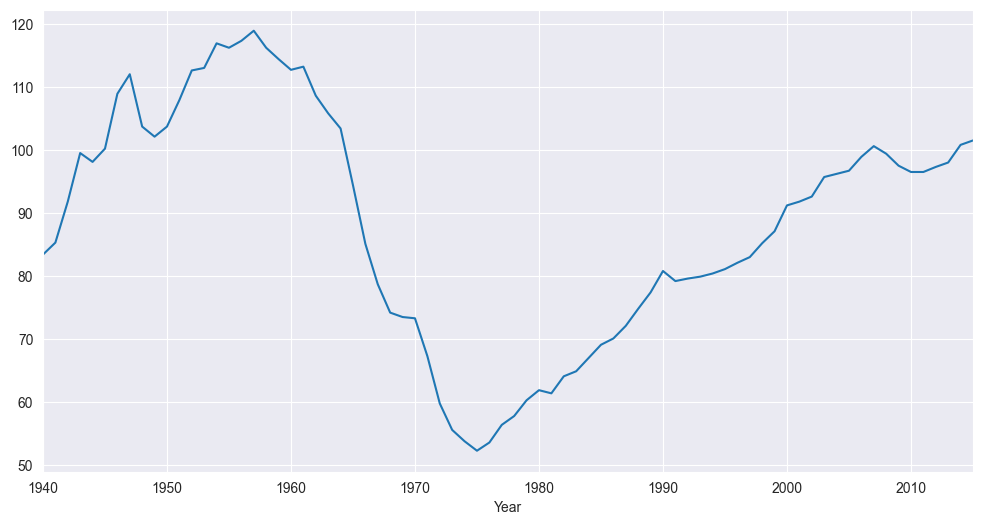

In [32]:
usbr_df = pd.read_csv('../datasets/US-Birth-Rates.csv', index_col='Year', parse_dates=True)
usbr_df['30-34'].plot()

<Axes: >

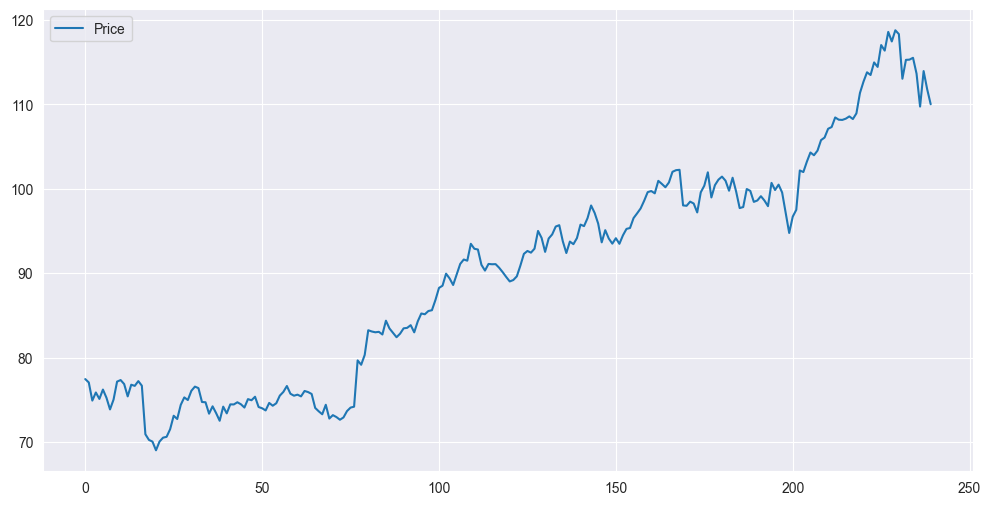

In [33]:
usbr_df = pd.read_csv('../datasets/appl2.csv')
usbr_df.plot()

##### ARIMA (Integrated)

##### Stationary Datasets

In [35]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Dickey-Fuller Test")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value',
                         '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

adf_test(df_2)


Dickey-Fuller Test
Test Statistic                -1.251942e+01
p-value                        2.568080e-23
#Lags Used                     3.300000e+01
Number of Observations Used    5.444000e+03
dtype: float64
